In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
!ls "/content/drive/MyDrive"


'abusive content detection and prevention platform.drawio'
'associate cert.pdf'
'AWS cert.pdf'
'cat_img.zip '
 cat_voice.zip
 certificates.pdf
'Colab Notebooks'
'Copy of Copy of PPT TEMPLATE (4).pptx'
 DOC-20241127-WA0029..pdf
'Document from Mithali♡☆'
 eCertificate.pdf
'flow charr'
'Github Details (1).xlsx'
'Github Details (2).xlsx'
'Github Details.xlsx'
'Google Student Ambassador.mp4'
 ibytecert.pdf
'ID .pdf'
'internship '
'Internship 6.0 social media post template.pptx'
 internship.pdf
 Madhumithaa_D_K_Resume.pdf
'marks .pdf'
'Nptel (1).pdf'
 Nptel.pdf
'oracle badge'
 pop23EC1202.pdf
'POP TRAINING ELIGIB;LE LIST.pdf'
'resume  (1).pdf'
'resume .pdf'
 ResumE.pdf
 resumeupdated.pdf
'screenshotttt (1).jpg'
 screenshotttt.jpg
'Untitled Diagram (1).drawio'
'Untitled Diagram (2).drawio'
'Untitled Diagram (3).drawio'
'Untitled Diagram (4).drawio'
'Untitled Diagram (5).drawio'
'Untitled Diagram.drawio'
'WhatsApp Image 2025-08-01 at 23.26.01_5bb8ccfa.jpg'


In [6]:
import zipfile
import os

extract_img_path = "/content/data/img"
extract_audio_path = "/content/data/audio"

os.makedirs(extract_img_path, exist_ok=True)
os.makedirs(extract_audio_path, exist_ok=True)

# Extract images
with zipfile.ZipFile("/content/drive/MyDrive/cat_img.zip ", 'r') as zip_ref:
    zip_ref.extractall(extract_img_path)

# Extract audio
with zipfile.ZipFile("/content/drive/MyDrive/cat_voice.zip", 'r') as zip_ref:
    zip_ref.extractall(extract_audio_path)

print("Extraction done!")
print("Image folders:", os.listdir(extract_img_path))
print("Audio folders:", os.listdir(extract_audio_path))


Extraction done!
Image folders: ['Scared', 'Angry', 'Happy', 'Surprised', 'Normal', 'Sad', 'Disgusted']
Audio folders: ['CAT_DB']


In [7]:
import os
from PIL import Image

IMG_DIR = "/content/data/img"
AUDIO_DIR = "/content/data/audio/CAT_DB"

print("=== IMAGE DATASET ===")
for emo in sorted(os.listdir(IMG_DIR)):
    path = os.path.join(IMG_DIR, emo)
    if os.path.isdir(path):
        count = len([f for f in os.listdir(path) if f.lower().endswith(('.jpg','.jpeg','.png'))])
        print(f"{emo:<12} : {count} images")

print("\n=== AUDIO DATASET ===")
for folder in os.listdir(AUDIO_DIR):
    path = os.path.join(AUDIO_DIR, folder)
    if os.path.isdir(path):
        count = len([f for f in os.listdir(path) if f.lower().endswith(('.wav','.mp3'))])
        print(f"{folder:<12} : {count} audio files")


=== IMAGE DATASET ===
Angry        : 360 images
Disgusted    : 201 images
Happy        : 236 images
Normal       : 246 images
Sad          : 258 images
Scared       : 257 images
Surprised    : 288 images

=== AUDIO DATASET ===
Paining      : 10 audio files
Angry        : 10 audio files
Happy        : 10 audio files
Mating       : 10 audio files
Resting      : 10 audio files
MotherCall   : 10 audio files
HuntingMind  : 10 audio files
Fighting     : 10 audio files
Defense      : 10 audio files


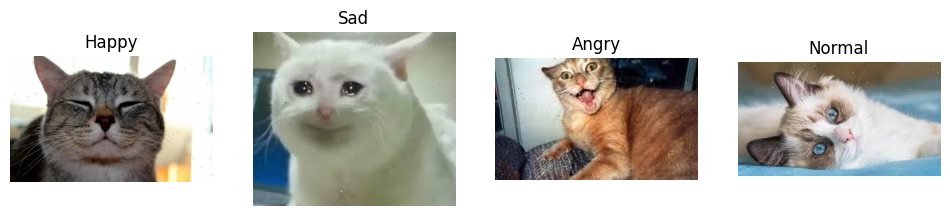

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for i, emo in enumerate(['Happy','Sad','Angry','Normal']):  # choose few for preview
    folder = os.path.join(IMG_DIR, emo)
    sample = os.listdir(folder)[0]  # first image
    img = Image.open(os.path.join(folder, sample))

    plt.subplot(1,4,i+1)
    plt.imshow(img)
    plt.title(emo)
    plt.axis('off')

plt.show()


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    IMG_DIR,
    target_size=(224,224),
    subset="training",
    batch_size=32,
    class_mode='categorical'
)

val_gen = datagen.flow_from_directory(
    IMG_DIR,
    target_size=(224,224),
    subset="validation",
    batch_size=32,
    class_mode='categorical'
)


Found 1479 images belonging to 7 classes.
Found 367 images belonging to 7 classes.


In [10]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

audio_input = AUDIO_DIR
audio_output = "/content/data/audio_spectrograms"
os.makedirs(audio_output, exist_ok=True)

for emo in os.listdir(audio_input):
    emo_folder = os.path.join(audio_input, emo)
    out_folder = os.path.join(audio_output, emo)
    os.makedirs(out_folder, exist_ok=True)

    for file in os.listdir(emo_folder):
        if file.lower().endswith(('.wav','.mp3')):
            y, sr = librosa.load(os.path.join(emo_folder,file), sr=16000)
            # Remove silent parts
            y, _ = librosa.effects.trim(y)

            # Generate Mel spectrogram
            mel = librosa.feature.melspectrogram(y=y, sr=sr)
            mel_db = librosa.power_to_db(mel, ref=np.max)

            # Save as image
            plt.figure(figsize=(3,3))
            librosa.display.specshow(mel_db, sr=sr, cmap='magma')
            plt.axis('off')

            out_path = os.path.join(out_folder, file.replace('.wav','.png').replace('.mp3','.png'))
            plt.savefig(out_path, bbox_inches='tight', pad_inches=0)
            plt.close()


In [11]:
from sklearn.preprocessing import LabelEncoder

# Image classes
image_classes = sorted(os.listdir(IMG_DIR))
print("Image Classes:", image_classes)

# Audio classes
audio_classes = sorted(os.listdir(audio_output))
print("Audio Classes:", audio_classes)

# Label encoding example
le = LabelEncoder()
le.fit(image_classes + audio_classes)
print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Image Classes: ['Angry', 'Disgusted', 'Happy', 'Normal', 'Sad', 'Scared', 'Surprised']
Audio Classes: ['Angry', 'Defense', 'Fighting', 'Happy', 'HuntingMind', 'Mating', 'MotherCall', 'Paining', 'Resting', 'Warning']
Label mapping: {np.str_('Angry'): np.int64(0), np.str_('Defense'): np.int64(1), np.str_('Disgusted'): np.int64(2), np.str_('Fighting'): np.int64(3), np.str_('Happy'): np.int64(4), np.str_('HuntingMind'): np.int64(5), np.str_('Mating'): np.int64(6), np.str_('MotherCall'): np.int64(7), np.str_('Normal'): np.int64(8), np.str_('Paining'): np.int64(9), np.str_('Resting'): np.int64(10), np.str_('Sad'): np.int64(11), np.str_('Scared'): np.int64(12), np.str_('Surprised'): np.int64(13), np.str_('Warning'): np.int64(14)}


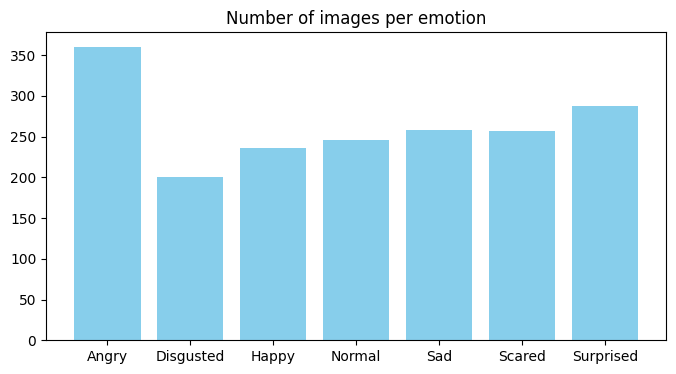

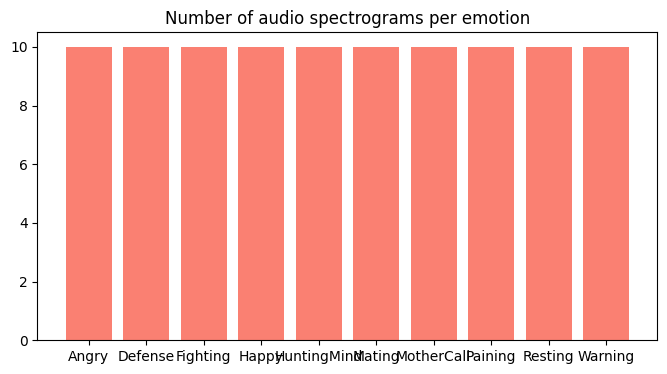

In [12]:
# Image counts bar chart
import matplotlib.pyplot as plt

img_counts = [len(os.listdir(os.path.join(IMG_DIR, c))) for c in image_classes]
plt.figure(figsize=(8,4))
plt.bar(image_classes, img_counts, color='skyblue')
plt.title("Number of images per emotion")
plt.show()

# Audio spectrogram counts
audio_counts = [len(os.listdir(os.path.join(audio_output,c))) for c in audio_classes]
plt.figure(figsize=(8,4))
plt.bar(audio_classes, audio_counts, color='salmon')
plt.title("Number of audio spectrograms per emotion")
plt.show()


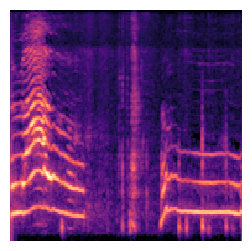

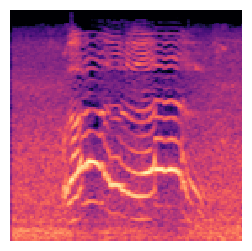

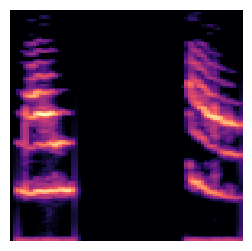

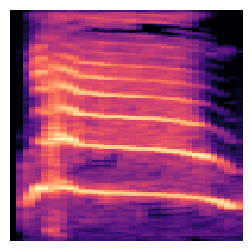

In [13]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

audio_input = "/content/data/audio/CAT_DB"
audio_output = "/content/data/audio_spectrograms"
os.makedirs(audio_output, exist_ok=True)

# Pick a few emotions to preview
preview_emotions = ['Happy', 'Angry', 'Sad']

for emo in os.listdir(audio_input):
    emo_folder = os.path.join(audio_input, emo)
    out_folder = os.path.join(audio_output, emo)
    os.makedirs(out_folder, exist_ok=True)

    for i, file in enumerate(os.listdir(emo_folder)):
        if file.lower().endswith(('.wav', '.mp3')):
            y, sr = librosa.load(os.path.join(emo_folder, file), sr=16000)
            y, _ = librosa.effects.trim(y)

            # Generate Mel spectrogram
            mel = librosa.feature.melspectrogram(y=y, sr=sr)
            mel_db = librosa.power_to_db(mel, ref=np.max)

            # Save as image
            out_path = os.path.join(out_folder, file.replace('.wav','.png').replace('.mp3','.png'))
            plt.figure(figsize=(3,3))
            librosa.display.specshow(mel_db, sr=sr, cmap='magma')
            plt.axis('off')
            plt.savefig(out_path, bbox_inches='tight', pad_inches=0)

            # Show the first few spectrograms inline
            if emo in preview_emotions and i < 2:  # show first 2 examples per emotion
                plt.show()
            plt.close()


In [14]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [15]:
IMG_DIR = "/content/data/img_clean"
AUDIO_DIR = "/content/data/audio_spectrograms"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20


In [17]:
import os

print("Folders inside /content:")
print(os.listdir("/content"))

print("\nFolders inside /content/data (if exists):")
if os.path.exists("/content/data"):
    print(os.listdir("/content/data"))
else:
    print("/content/data DOES NOT EXIST")


Folders inside /content:
['.config', 'data', 'drive', 'sample_data']

Folders inside /content/data (if exists):
['audio', 'img', 'audio_spectrograms']


In [19]:
import os
import shutil

RAW_IMG_PATH = "/content/data/img"
CLEAN_PATH = "/content/data/img_clean"

# Remove old img_clean if any
if os.path.exists(CLEAN_PATH):
    shutil.rmtree(CLEAN_PATH)

os.makedirs(CLEAN_PATH, exist_ok=True)

# Copy emotion folders
for emo in os.listdir(RAW_IMG_PATH):
    emo_path = os.path.join(RAW_IMG_PATH, emo)
    if os.path.isdir(emo_path):
        shutil.copytree(emo_path, os.path.join(CLEAN_PATH, emo))

print("img_clean created successfully")
print("Folders inside img_clean:", os.listdir(CLEAN_PATH))


img_clean created successfully
Folders inside img_clean: ['Scared', 'Angry', 'Happy', 'Surprised', 'Normal', 'Sad', 'Disgusted']


In [20]:
for emo in sorted(os.listdir("/content/data/img_clean")):
    path = os.path.join("/content/data/img_clean", emo)
    print(f"{emo:<12} : {len(os.listdir(path))} images")


Angry        : 360 images
Disgusted    : 201 images
Happy        : 236 images
Normal       : 246 images
Sad          : 258 images
Scared       : 257 images
Surprised    : 288 images


**MILESTONE 2**

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_DIR = "/content/data/img_clean"
IMG_SIZE = (224, 224)

img_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_img = img_datagen.flow_from_directory(
    IMG_DIR,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_img = img_datagen.flow_from_directory(
    IMG_DIR,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1479 images belonging to 7 classes.
Found 367 images belonging to 7 classes.


In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import confusion_matrix, classification_report


In [23]:
IMG_DIR = "/content/data/img_clean"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

img_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_img = img_datagen.flow_from_directory(
    IMG_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

val_img = img_datagen.flow_from_directory(
    IMG_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

CLASS_NAMES = list(train_img.class_indices.keys())
NUM_CLASSES = len(CLASS_NAMES)

print("Classes:", CLASS_NAMES)


Found 1479 images belonging to 7 classes.
Found 367 images belonging to 7 classes.
Classes: ['Angry', 'Disgusted', 'Happy', 'Normal', 'Sad', 'Scared', 'Surprised']


In [24]:
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

# Freeze pretrained layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(NUM_CLASSES, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,855 (9.24 MB)

 Trainable params: 164,871 (644.03 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [25]:
callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint("best_cnn_model.h5", save_best_only=True)
]

history = model.fit(
    train_img,
    validation_data=val_img,
    epochs=20,
    callbacks=callbacks
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1455 - loss: 2.3502

47/47 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.1460 - loss: 2.3470 - val_accuracy: 0.2207 - val_loss: 1.9182
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2126 - loss: 2.0117

47/47 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.2131 - loss: 2.0103 - val_accuracy: 0.2507 - val_loss: 1.8411
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3057 - loss: 1.7899

47/47 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.3060 - loss: 1.7893 - val_accuracy: 0.2861 - val_loss: 1.8046
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3307 - loss: 1.7224

47/47 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.3311 - loss: 1.7219 - val_accuracy: 0.3597 - val_loss: 1.7186
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3623 - loss: 1.6422

47/47 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.3629 - loss: 1.6414 - val_accuracy: 0.3515 - val_loss: 1.6868
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.4396 - loss: 1.5368 - val_accuracy: 0.3733 - val_loss: 1.7013
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4420 - loss: 1.5064

47/47 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.4423 - loss: 1.5058 - val_accuracy: 0.3951 - val_loss: 1.6167
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4864 - loss: 1.4659

47/47 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.4860 - loss: 1.4657 - val_accuracy: 0.4060 - val_loss: 1.6138
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5468 - loss: 1.3184

47/47 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.5465 - loss: 1.3187 - val_accuracy: 0.3978 - val_loss: 1.5928
Epoch 10/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5447 - loss: 1.2958

47/47 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.5445 - loss: 1.2961 - val_accuracy: 0.4196 - val_loss: 1.5759
Epoch 11/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5427 - loss: 1.2901

47/47 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.5428 - loss: 1.2899 - val_accuracy: 0.4523 - val_loss: 1.5573
Epoch 12/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.5740 - loss: 1.2392 - val_accuracy: 0.4414 - val_loss: 1.5738
Epoch 13/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5949 - loss: 1.1586

47/47 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.5947 - loss: 1.1591 - val_accuracy: 0.4768 - val_loss: 1.5047
Epoch 14/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.6184 - loss: 1.1110 - val_accuracy: 0.4332 - val_loss: 1.5674
Epoch 15/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.6218 - loss: 1.1133 - val_accuracy: 0.4659 - val_loss: 1.5053
Epoch 16/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6234 - loss: 1.0764

47/47 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.6235 - loss: 1.0762 - val_accuracy: 0.4823 - val_loss: 1.4918
Epoch 17/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.6504 - loss: 1.0280 - val_accuracy: 0.4796 - val_loss: 1.4970
Epoch 18/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6617 - loss: 1.0202

47/47 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.6618 - loss: 1.0199 - val_accuracy: 0.4932 - val_loss: 1.4876
Epoch 19/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.6860 - loss: 0.9826 - val_accuracy: 0.4850 - val_loss: 1.5156
Epoch 20/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.6665 - loss: 0.9854 - val_accuracy: 0.4714 - val_loss: 1.5027


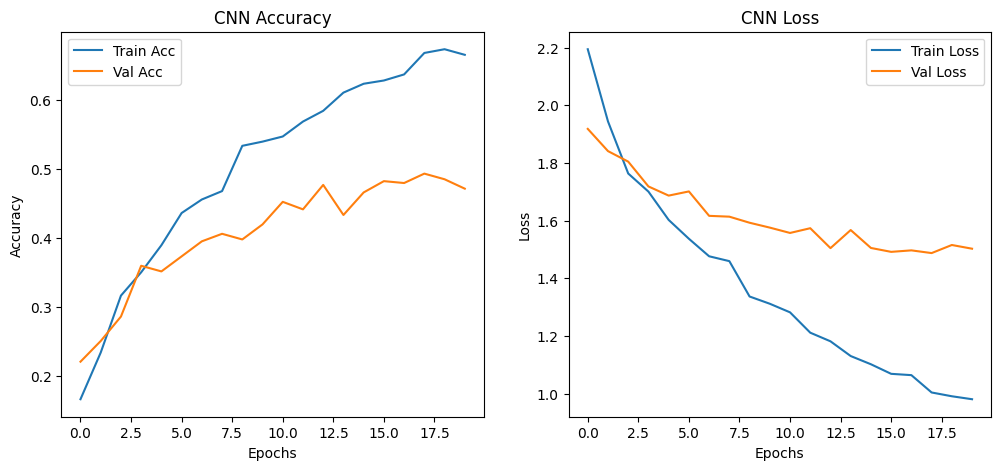

In [26]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("CNN Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("CNN Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


In [27]:
val_img.reset()
y_pred = model.predict(val_img)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_img.classes


12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step


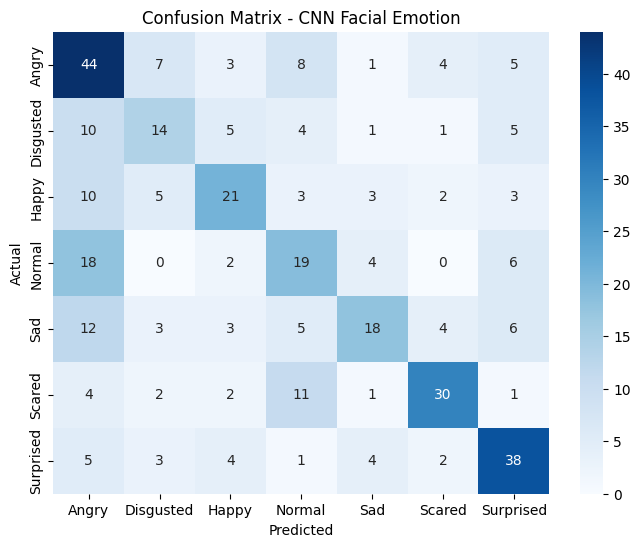

In [28]:
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=CLASS_NAMES,
            yticklabels=CLASS_NAMES,
            cmap="Blues")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CNN Facial Emotion")
plt.show()


In [30]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=CLASS_NAMES))


Classification Report:

              precision    recall  f1-score   support

       Angry       0.43      0.61      0.50        72
   Disgusted       0.41      0.35      0.38        40
       Happy       0.53      0.45      0.48        47
      Normal       0.37      0.39      0.38        49
         Sad       0.56      0.35      0.43        51
      Scared       0.70      0.59      0.64        51
   Surprised       0.59      0.67      0.63        57

    accuracy                           0.50       367
   macro avg       0.51      0.49      0.49       367
weighted avg       0.51      0.50      0.50       367



In [31]:
import os
import librosa
import numpy as np

AUDIO_DIR = "/content/data/audio/CAT_DB"
MAX_LEN = 130   # fixed length for LSTM

X_audio = []
y_audio = []
label_map = {}

for idx, emotion in enumerate(sorted(os.listdir(AUDIO_DIR))):
    label_map[emotion] = idx
    emo_path = os.path.join(AUDIO_DIR, emotion)

    for file in os.listdir(emo_path):
        if file.endswith(".wav"):
            file_path = os.path.join(emo_path, file)
            y, sr = librosa.load(file_path, sr=16000)
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

            # Padding / Truncating
            if mfcc.shape[1] < MAX_LEN:
                pad_width = MAX_LEN - mfcc.shape[1]
                mfcc = np.pad(mfcc, ((0,0),(0,pad_width)))
            else:
                mfcc = mfcc[:, :MAX_LEN]

            X_audio.append(mfcc.T)
            y_audio.append(idx)

X_audio = np.array(X_audio)
y_audio = np.array(y_audio)

print("Audio data shape:", X_audio.shape)
print("Labels:", label_map)


Audio data shape: (0,)
Labels: {'Angry': 0, 'Defense': 1, 'Fighting': 2, 'Happy': 3, 'HuntingMind': 4, 'Mating': 5, 'MotherCall': 6, 'Paining': 7, 'Resting': 8, 'Warning': 9}


In [34]:
import os
import librosa
import numpy as np

AUDIO_DIR = "/content/data/audio/CAT_DB"
MAX_LEN = 130

label_map = {
    "Happy": 0,      # happy
    "Resting": 1,    # sad
    "Angry": 2,      # angry
    "Fighting": 3,   # fear
    "Warning": 3,
    "Defense": 3
}

X_audio = []
y_audio = []

for folder in os.listdir(AUDIO_DIR):
    if folder not in label_map:
        continue

    folder_path = os.path.join(AUDIO_DIR, folder)

    for file in os.listdir(folder_path):
        if file.endswith(".mp3") or file.endswith(".wav"):
            path = os.path.join(folder_path, file)

            y, sr = librosa.load(path, sr=16000)
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

            if mfcc.shape[1] < MAX_LEN:
                mfcc = np.pad(mfcc, ((0,0),(0, MAX_LEN-mfcc.shape[1])))
            else:
                mfcc = mfcc[:, :MAX_LEN]

            X_audio.append(mfcc.T)
            y_audio.append(label_map[folder])

X_audio = np.array(X_audio)
y_audio = np.array(y_audio)

print("Audio samples:", X_audio.shape)
print("Labels:", np.unique(y_audio))


Audio samples: (60, 130, 40)
Labels: [0 1 2 3]


AUDIO LSTM MODEL

In [35]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

y_audio_cat = to_categorical(y_audio, num_classes=4)

X_train, X_temp, y_train, y_temp = train_test_split(
    X_audio, y_audio_cat, test_size=0.3, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print("Train:", X_train.shape)
print("Val:", X_val.shape)
print("Test:", X_test.shape)


Train: (42, 130, 40)
Val: (9, 130, 40)
Test: (9, 130, 40)


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

audio_model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(130, 40)),
    Dropout(0.3),
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

audio_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

audio_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 130, 128)       │        86,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 130, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 140,356 (548.27 KB)

 Trainable params: 140,356 (548.27 KB)

 Non-trainable params: 0 (0.00 B)

TRAIN AUDIO MODEL

In [37]:
history_audio = audio_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=16
)


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 412ms/step - accuracy: 0.2682 - loss: 1.4091 - val_accuracy: 0.4444 - val_loss: 1.3374
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.6730 - loss: 1.2804 - val_accuracy: 0.5556 - val_loss: 1.2420
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 0.6261 - loss: 1.1498 - val_accuracy: 0.6667 - val_loss: 1.1233
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.6458 - loss: 1.0924 - val_accuracy: 0.6667 - val_loss: 1.0312
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.6458 - loss: 0.9466 - val_accuracy: 0.6667 - val_loss: 0.9577
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.6380 - loss: 0.8336 - val_accuracy: 0.6667 - val_loss: 0.8647
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - accuracy: 0.7437 - loss: 0.6228 - val_accuracy: 0.6667 - val_loss: 0.9001
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.8032 - loss: 0.5289 - val_accuracy: 0.6667 - val_loss:

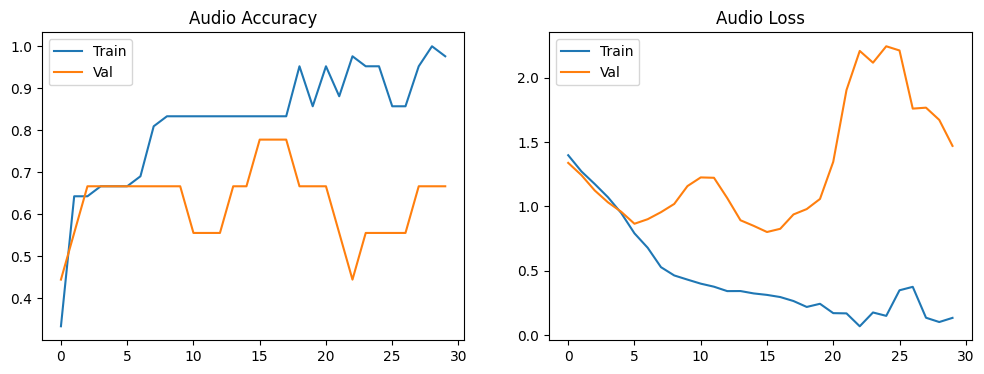

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_audio.history['accuracy'], label='Train')
plt.plot(history_audio.history['val_accuracy'], label='Val')
plt.title("Audio Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_audio.history['loss'], label='Train')
plt.plot(history_audio.history['val_loss'], label='Val')
plt.title("Audio Loss")
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


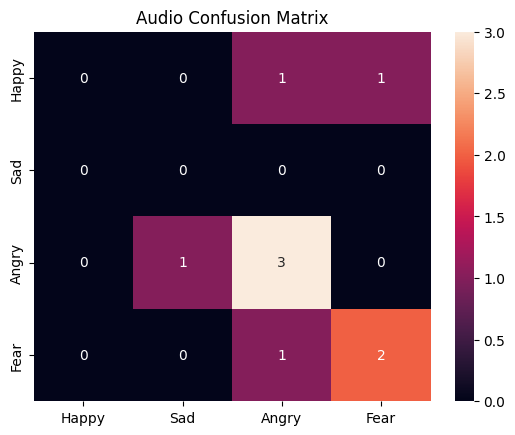

              precision    recall  f1-score   support

       Happy       0.00      0.00      0.00         2
         Sad       0.00      0.00      0.00         0
       Angry       0.60      0.75      0.67         4
        Fear       0.67      0.67      0.67         3

    accuracy                           0.56         9
   macro avg       0.32      0.35      0.33         9
weighted avg       0.49      0.56      0.52         9



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = audio_model.predict(X_test)
y_pred_cls = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_cls)

sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=['Happy','Sad','Angry','Fear'],
            yticklabels=['Happy','Sad','Angry','Fear'])
plt.title("Audio Confusion Matrix")
plt.show()

print(classification_report(y_true, y_pred_cls,
      target_names=['Happy','Sad','Angry','Fear']))
